In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load and prepare the data
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

In [5]:
#load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
#shape of the traning 
x_train.shape

# We have 60,000 image with 28 by 28 pixels

(60000, 28, 28)

In [7]:
#shape of the training label
y_train.shape

(60000,)

In [8]:
#view the first image's shape
x_train[8].shape

(28, 28)

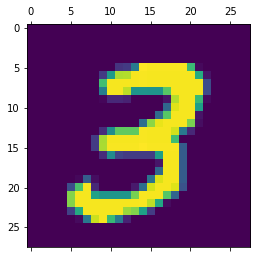

In [9]:
#view the image/feature at the index 7 
plt.matshow(x_train[7])

In [10]:
#view the label at index 7
y_train[7]

3

**Normalization**

Normalization is the process of translating the data in range [0, 1] or in any range.

In [11]:
x_train = x_train/255
x_test = x_test/255

**we're going to send the traning data to the neural network so we need to flatten them , so that we only have one long column with those feature values**

In [12]:

x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

In [13]:
# Now we have 60000 rows with 784 columns
x_train_flat.shape

(60000, 784)

In [14]:
#view the  image
x_train[0].shape

(28, 28)

## Now create  and train the model

we have Keras, a deep learning API written in Python running on top of Tensorflow, that makes our work of building complex neural networks much easier.

Keras offers two ways to build neural network.

1. **squential API :**  Create a model layer by layer. It is easy but it's not flexible.It only allows to you have  one input mapping to one out put.

2. **Functional API:**  It is more flexible than sequential API. It's more powerful than squential API.

 **Create a model**

In [35]:
model = Sequential([
    layers.Dense(784, activation = 'relu'),
    layers.Dense(10,  activation = 'softmax')

])

**tf.keras.losses.SparseCategoricalCrossentropy :** Computes the crossentropy loss between the labels and predictions. We use this loss when the label is an integer. If the labe is provided as one-hot encoding we use **CategoricalCrossentropy**. So what **Categorical** means our output/label class is categorical 0-9.



In [36]:
#defining the optimizer and the loss function
model.compile( loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam', metrics = ['accuracy'])

**train the model**

In [37]:
model.fit(x_train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1878 - accuracy: 0.9445
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0756 - accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0482 - accuracy: 0.9852
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0344 - accuracy: 0.9891
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0261 - accuracy: 0.9909


**Evaluate the model**

In [32]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0812 - accuracy: 0.9786


[0.08116555958986282, 0.978600025177002]

In [34]:
#Some information about the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 530)               416050    
                                                                 
 dense_6 (Dense)             (None, 230)               122130    
                                                                 
 dense_7 (Dense)             (None, 10)                2310      
                                                                 
Total params: 540,490
Trainable params: 540,490
Non-trainable params: 0
_________________________________________________________________


**Prediction**

In [57]:
y_predicted = model.predict(x_test_flat)

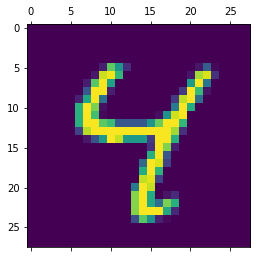

In [58]:
#view the 7th image 
plt.matshow(x_test[6])

In [59]:
#return the indices of the maximum value
np.argmax(y_predicted[6])

4

In [60]:
y_predicted[6]

array([5.0076811e-14, 1.9712159e-12, 1.1433156e-09, 2.7195128e-12,
       9.9988854e-01, 1.6242394e-08, 1.6011667e-08, 6.3842413e-07,
       1.0853458e-04, 2.2803508e-06], dtype=float32)

**Confusion matrix**

 what is confusion matrix
 
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

In [61]:
y_predictd_label = [np.argmax(i) for i in y_predicted]

In [62]:
con = tf.math.confusion_matrix(labels = y_test, predictions = y_predictd_label)

In [63]:
con

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    0,    1,    0,    3,    2,    1,    3],
       [   0, 1123,    2,    0,    0,    0,    2,    2,    6,    0],
       [   5,    1, 1000,    3,    3,    0,    0,    9,   10,    1],
       [   0,    0,    5,  994,    0,    2,    0,    4,    3,    2],
       [   1,    0,    6,    0,  965,    0,    3,    1,    1,    5],
       [   2,    0,    0,    8,    1,  873,    4,    1,    1,    2],
       [   2,    3,    1,    1,   10,    8,  931,    1,    1,    0],
       [   0,    1,    3,    1,    2,    0,    0, 1016,    1,    4],
       [   3,    1,    2,    2,    4,    5,    2,    4,  950,    1],
       [   0,    2,    0,    3,    9,    2,    0,    8,    2,  983]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

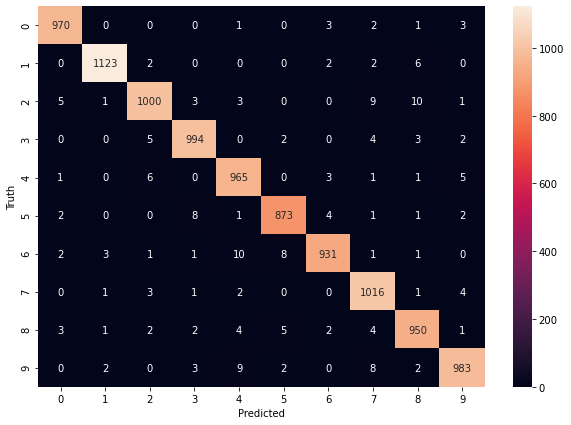

In [64]:
plt.figure(figsize= (10, 7))
sns.heatmap(con, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')